# Machine learning의 기초 및 실습

### Machine learning, ML ( 기계학습 )
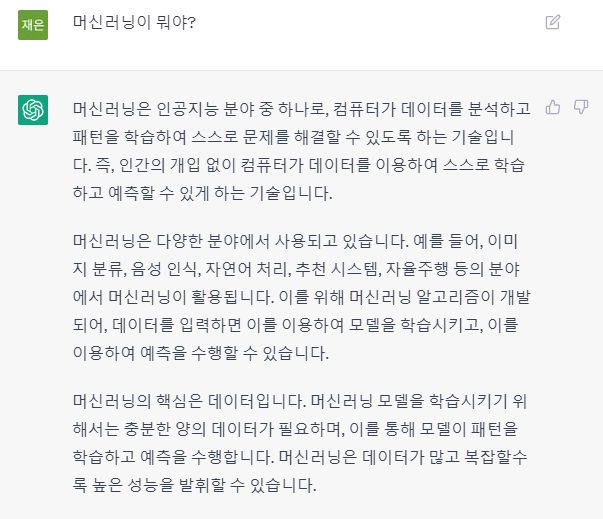
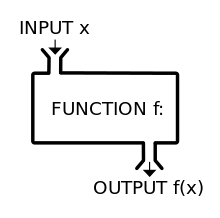

## AI, Deep Learning, Machine Learning
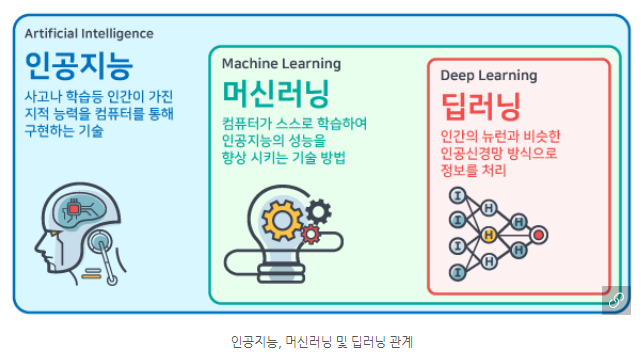
>AI : 인간의 '지능'을 구현하려는 컴퓨터과학의 세부 분야 중 하나. 

>Machine Learning : 컴퓨터가 경험을 통해 자동으로 개선하는 컴퓨터 알고리즘의 연구. 컴퓨터가 학습할 수 있도록 하는 알고리즘과 기술을 개발하는 분야이다. 

>DL : 여러 비선형 변환기법의 조합을 통해 높은 수준의 추상화를 시도하는 기계학습 알고리즘의 집ㅎ바으로 정의되며, 큰 틀에서 사람의 사고방식을 컴퓨터에게 가르치는 기계학습의 한 분야라고 이야기할 수 있다. 


### Machine learning 알고리즘 종류    
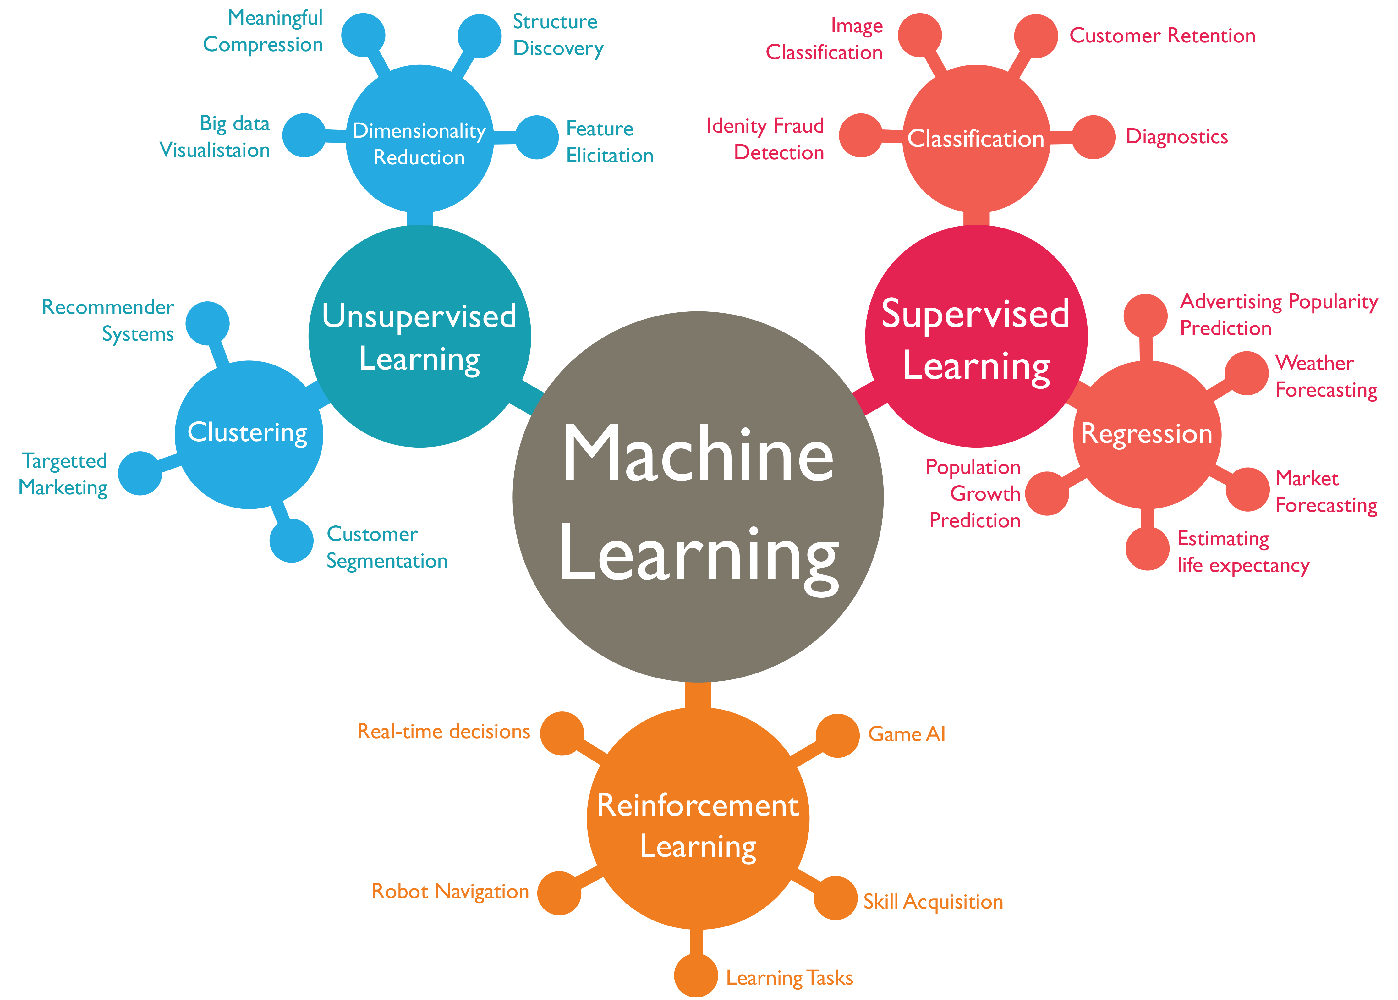

#### supervised learning
- 회귀 (Regression)    

- 분류 (Classification)    


#### unsupervised learning
- 군집화 (Clustering)    

- 차원 축소 (Dimensionality Reduction)    

    
#### reinforcement learning    


- '1. 회귀분석 (Regression test) 이란?',
 '회귀분석은 독립변인이 종속변인에 영향을 미치는지 알아보고자 할 때 실시하는 분석방법.',
 '단순 선형 회귀분석은 독립변수 X(설명변수)에 대하여 종속변수 Y(반응변수)들 사이의 관계를 수학적 모형을 이용하여 규명하는 것.',
 '규명된 함수식을 이용하여 설명변수들의 변화로부터 종속변수의 변화를 예측하는 분석이다.',

* classification and clustering의 차이 
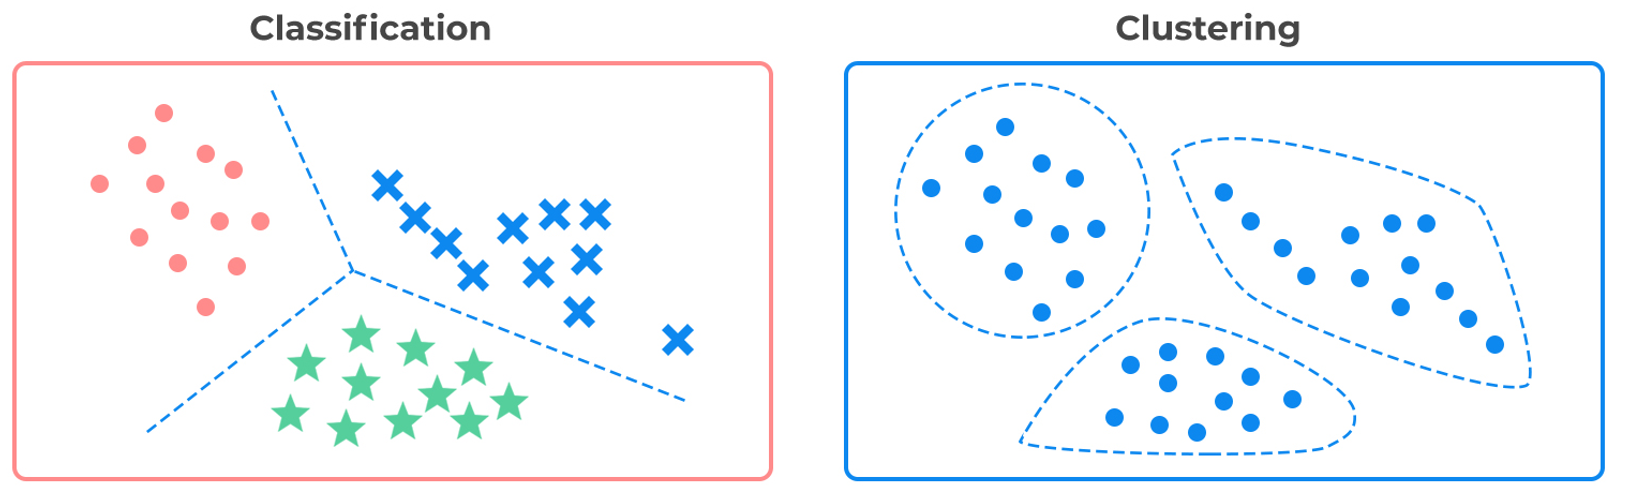

  ## Optimizer
    - loss function
    - gradient descent
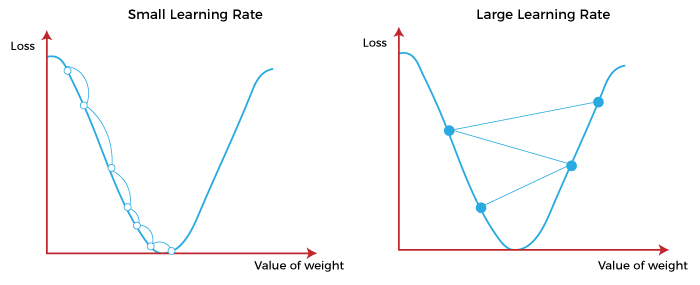

  ## 평가지표
        - FP, FN, TP, TN
            - recall, precision, accuracy
            - AP
            - mAP ; mean average precision
        - MSE ; Mean squared error

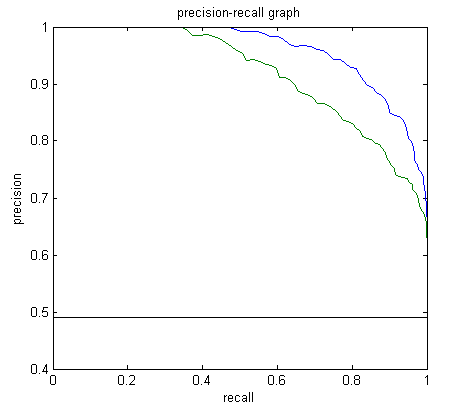
        

#supervised learning
    - linear regression 실습
    - classfication, SVM 실습

##### 회귀 (Regression)
- linear regression 

##### 분류 (Classification)
- SVM


# supervised learning -1
## Regression
- linear regression
- polynomial regression

In [25]:
#linear regression algorithm
# 데이터에 대한 예측값 함수 생성
import tensorflow as tf
import numpy as np

def function(x) : 
  y = w*x + b
  y = tf.cast(y, tf.float64)
  return y


In [70]:
# 100개의 샘플을 생성
n_samples = 100

# x는 0부터 1까지의 값을 가지는 벡터
X = np.linspace(0, 1, n_samples)

# y는 x에 임의의 노이즈를 더한 값입니다.
y = 3 * X + 2 + np.random.randn(n_samples) #seed



X = np.linspace(0, 1, n_samples)

이 코드 라인은 NumPy 라이브러리를 사용하여 0과 1 사이에서 균등하게 간격이 나누어진 n_samples 개수의 값을 가지는 배열인 X를 생성합니다.

np.linspace() 함수는 세 개의 인수를 받습니다. 시작점 (0), 끝점 (1) 및 생성할 샘플 수 (n_samples)입니다. 이 함수는 시작점과 끝점 사이에서 n_samples 개수의 값을 균등하게 나누어진 배열로 반환합니다.

예를 들어, n_samples이 5인 경우, 결과적으로 생성되는 배열은 다음과 같습니다: [0. 0.25 0.5 0.75 1. ]

이러한 배열은 일반적으로 수학적 계산이나 그래프 플로팅과 같이 균등하게 나뉘어진 점이 필요한 경우에 사용됩니다.

In [27]:
@tf.function
def mse_loss(y_pred, y) : 
  error = y_pred - y
  s_error = tf.square(error)
  ms_error = tf.reduce_mean(s_error)
  
  return ms_error

In [80]:
# 학습률
lr = 0.001
optimizer = tf.optimizers.SGD(lr)
w = tf.Variable(-1.)
b = tf.Variable(-1.)


In [68]:
import matplotlib.pyplot as plt

cost = 0

for i in range(200) : 
  i = i + 1
  with tf.GradientTape() as tape : 
    y_pred = function(X)
    cost = mse_loss(y_pred, y)
    if cost <1 :
        gradients = tape.gradient(cost, [w, b])
        optimizer.apply_gradients(zip(gradients, [w, b]))
        print('데이터\n', y)
        print('데이터 예측\n', y_pred)
        print('오차\n' , cost)

        if i % 10 == 0 :
          print("epoch : {:3} | w의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f} | lr : {:5.6f}".format(i, w.numpy(), b.numpy(), cost, lr))



In [83]:
# 100개의 샘플을 생성
n_samples = 10000

# x는 0부터 1까지의 값을 가지는 벡터
X = np.linspace(0, 1, n_samples)

# y는 x에 임의의 노이즈를 더한 값입니다.
y = 3 * X + 2 + np.random.randn(n_samples) #seed

import matplotlib.pyplot as plt

cost = 0

for i in range(1000) : 
  i = i + 1
  with tf.GradientTape() as tape : 
    y_pred = function(X)
    cost = mse_loss(y_pred, y)
    if cost >0 :
        gradients = tape.gradient(cost, [w, b])
        optimizer.apply_gradients(zip(gradients, [w, b]))
        #print('데이터\n', y)
        #print('데이터 예측\n', y_pred)
        #print('오차\n' , cost)

        if i % 10 == 0 :
          print("epoch : {:3} | w의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f} | lr : {:5.6f}".format(i, w.numpy(), b.numpy(), cost, lr))



epoch :  10 | w의 값 : 1.5675 | b의 값 : 2.736 | cost : 1.162994 | lr : 0.001000
epoch :  20 | w의 값 : 1.5697 | b의 값 : 2.736 | cost : 1.162509 | lr : 0.001000
epoch :  30 | w의 값 : 1.5719 | b의 값 : 2.736 | cost : 1.162029 | lr : 0.001000
epoch :  40 | w의 값 : 1.5741 | b의 값 : 2.736 | cost : 1.161553 | lr : 0.001000
epoch :  50 | w의 값 : 1.5762 | b의 값 : 2.735 | cost : 1.161081 | lr : 0.001000
epoch :  60 | w의 값 : 1.5783 | b의 값 : 2.735 | cost : 1.160613 | lr : 0.001000
epoch :  70 | w의 값 : 1.5805 | b의 값 : 2.735 | cost : 1.160149 | lr : 0.001000
epoch :  80 | w의 값 : 1.5826 | b의 값 : 2.734 | cost : 1.159689 | lr : 0.001000
epoch :  90 | w의 값 : 1.5847 | b의 값 : 2.734 | cost : 1.159232 | lr : 0.001000
epoch : 100 | w의 값 : 1.5868 | b의 값 : 2.734 | cost : 1.158779 | lr : 0.001000
epoch : 110 | w의 값 : 1.5889 | b의 값 : 2.733 | cost : 1.158329 | lr : 0.001000
epoch : 120 | w의 값 : 1.5910 | b의 값 : 2.733 | cost : 1.157882 | lr : 0.001000
epoch : 130 | w의 값 : 1.5930 | b의 값 : 2.732 | cost : 1.157438 | lr : 0.001000

해당 코드는 TensorFlow를 사용하여 선형 회귀 모델을 학습하는 코드입니다.

먼저, 모델의 예측값과 정답값 사이의 오차를 계산하는 손실 함수(mse_loss)를 정의하고, 모델의 가중치(w)와 편향(b)를 초기화합니다. 그리고 옵티마이저(optimizer)를 정의하고, 이를 사용하여 가중치와 편향을 업데이트합니다.

학습을 위해 반복문을 사용하며, 각 반복에서는 다음과 같은 과정이 수행됩니다.

tf.GradientTape()를 이용하여 계산 과정을 기록합니다.

1. 모델의 예측값(y_pred)을 계산합니다.
2. 손실 함수(mse_loss)을 사용하여 예측값과 정답값(y) 사이의 오차(cost)를 계산합니다.
3. tape.gradient()를 사용하여 손실(cost)에 대한 가중치(w)와 편향(b)의 미분 값을 계산합니다.
4. optimizer.apply_gradients()를 사용하여 가중치(w)와 편향(b)을 업데이트합니다.

이러한 과정을 일정한 epoch 수 만큼 반복하면서, 가중치와 편향이 최적화되어 모델의 예측값이 실제 값과 가까워지도록 학습하는 것입니다.

반복문에서는 또한, 매 10 epoch 마다 현재 epoch 수, 가중치(w)와 편향(b)의 값, 손실(cost), 학습률(lr) 등을 출력합니다. 이를 통해 학습 과정을 모니터링하고, 성능 개선을 위한 추가적인 조치를 취할 수 있습니다.

cost 값을 0.9로 줄이기 위해서는 여러 가지 방법이 있겠지만, 일반적으로는 다음과 같은 절차를 따를 수 있습니다.

학습률(learning rate)을 적절한 값으로 설정합니다. 학습률은 가중치와 편향을 업데이트할 때 얼마나 큰 보폭으로 업데이트할지를 결정하는 하이퍼파라미터입니다. 너무 작으면 학습이 느리게 진행되고, 너무 크면 학습이 불안정해질 수 있습니다. 따라서 적절한 학습률을 선택하는 것이 중요합니다.

더 많은 epoch을 수행합니다. 반복 횟수(epoch)를 늘리면 모델이 더 많은 학습 데이터를 이용하여 학습할 수 있으므로, 일반적으로 epoch 수를 늘리면 성능이 향상됩니다.

더 많은 학습 데이터를 사용합니다. 모델이 학습할 수 있는 데이터의 양이 많을수록 모델의 성능이 향상됩니다. 따라서 가능하면 더 많은 학습 데이터를 사용하는 것이 좋습니다.

모델의 구조를 변경합니다. 모델의 구조를 변경하여 모델이 더 복잡한 패턴을 학습할 수 있도록 만들 수 있습니다. 예를 들어, 더 많은 층(layer)을 추가하거나, 각 층의 노드 수(node)를 늘리는 등의 방법이 있습니다.

정규화(regularization) 기법을 사용합니다. 정규화 기법은 모델이 과적합(overfitting)되는 것을 방지하기 위한 기법으로, 일반적으로 L1 또는 L2 규제를 사용합니다. 이를 통해 모델이 더 일반화된 패턴을 학습하도록 만들 수 있습니다.

이러한 방법들을 적절하게 조합하여 모델의 성능을 향상시키면, cost 값을 0.9로 줄일 수 있습니다

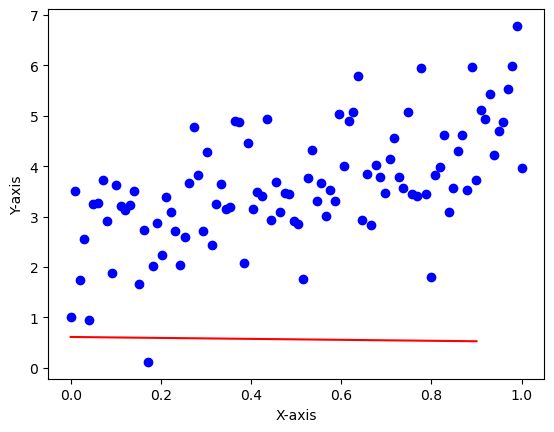

In [8]:
plt.scatter(X, y, c = 'blue')
r = np.arange(0, 1, 0.1)
y_pred = function(r)
plt.plot(r, y_pred, c = 'red')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [9]:
#linear regression module
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


# 100개의 샘플을 생성합니다.
n_samples = 100

# x는 0부터 1까지의 값을 가지는 벡터입니다.
X = np.linspace(0, 1, n_samples)

# y는 x에 임의의 노이즈를 더한 값입니다.
y = 3 * X + 2 + np.random.randn(n_samples)

# LinearRegression 모델을 생성하고 데이터를 학습시킵니다.
model = LinearRegression()


model.fit(X.reshape(-1, 1), y)

# 학습된 모델의 기울기와 절편을 출력합니다.
print("기울기:", model.coef_[0])
print("절편:", model.intercept_)

# 예측 결과
y_pred = model.predict(X.reshape(-1, 1))

# 결과 시각화


기울기: 3.039757309233748
절편: 1.8529543175693328


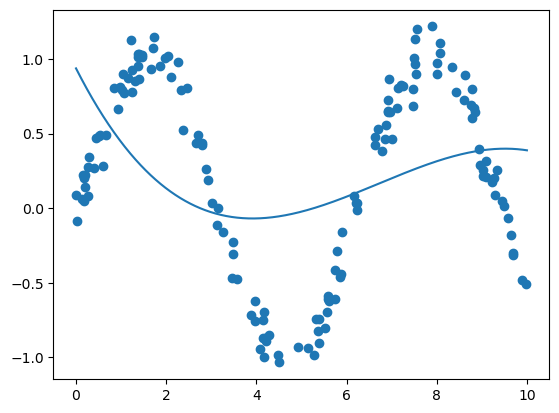

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# 데이터 생성
rng = np.random.RandomState(1)
x = 10 * rng.rand(150)
y = np.sin(x) + 0.1 * rng.randn(150)

# 모델 훈련
model = make_pipeline(PolynomialFeatures(3), LinearRegression())
model.fit(x[:, np.newaxis], y)

# 예측
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

# 결과 시각화
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.show()

## overfitting & underfitting

## linear predictor vs polynoimial predictor
-  computation resource
    - time complexity



# supervised learning -2
## Classification
- SVM model

In [11]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 붓꽃 데이터셋을 불러옵니다.
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# SVM 모델을 생성하고 학습시킵니다.
clf = SVC(kernel='linear', C=1.0, random_state=42)
clf.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [14]:
# 테스트 데이터셋을 사용하여 모델을 평가합니다.
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


# Unsupervised learning
    - clustering
    - dimensionality reduction
##### clustering
- k-means clustering

##### dimensionality reduction
- PCA

#unsupervised learning -1

### 군집화 (Clustering)
- K-means


In [15]:
#k-means 알고리즘 구현
import numpy as np
import matplotlib.pyplot as plt

def kmeans(X, k, max_iter=100):
    # Step 1: 초기 클러스터 중심점 선택
    centroids = X[np.random.choice(len(X), k, replace=False)]
    
    # Step 2-3: max_iter번 반복
    for _ in range(max_iter):
        # 각 데이터 포인트의 클러스터 할당
        distances = np.linalg.norm(X[:, np.newaxis, :] - centroids, axis=-1)
        cluster_labels = np.argmin(distances, axis=1)
        
        # 새로운 클러스터 중심점 선택
        new_centroids = np.array([X[cluster_labels == i].mean(axis=0) for i in range(k)])
        
        # 클러스터 중심점이 더 이상 변하지 않으면 종료
        if np.allclose(centroids, new_centroids):
            break
        
        centroids = new_centroids
    
    return centroids, cluster_labels

In [16]:
def plot_clusters(X, centroids, cluster_labels):
    plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, s=50, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5)
    plt.show()

In [17]:
# 데이터 생성
np.random.seed(0)
X1 = np.random.randn(50, 2) * 2 + [6, 6]
X2 = np.random.randn(50, 2) * 2 - [6, 6]
X3 = np.random.randn(100, 2) * 2 + [6, -6]
X = np.concatenate([X1, X2, X3], axis=0)

# k-means 알고리즘 실행
###구현

# 클러스터 시각화
plot_clusters(X, centroids, cluster_labels)



NameError: name 'centroids' is not defined

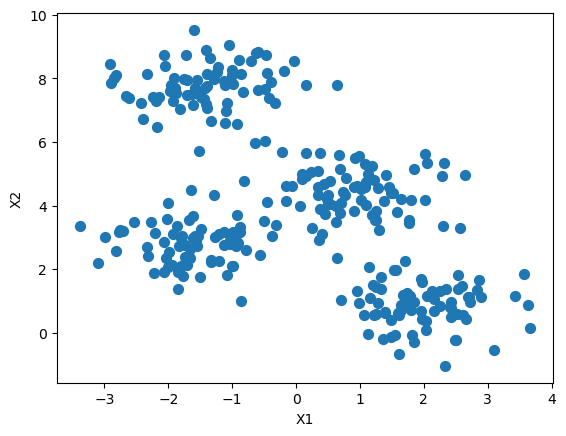

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


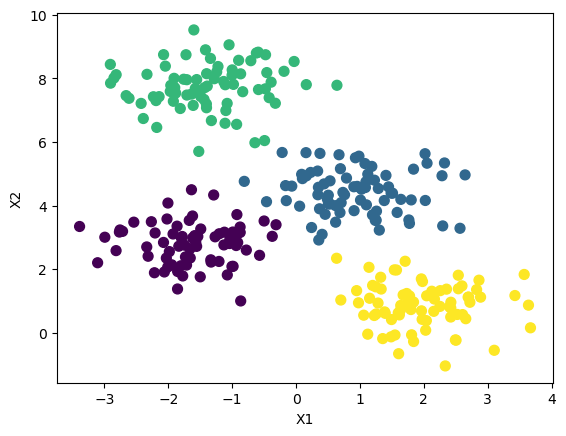

In [18]:
#k-means 라이브러리 사용
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 2차원 데이터 4개 클러스터 생성
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=0.7)

# 데이터 시각화
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# KMeans 알고리즘 적용
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# 클러스터링 결과 시각화
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=50)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# unsupervised learning -2
### 차원 축소 (Dimensionality Reduction)
- PCA, principal component analysis


original data shape :  (150, 4)
transformed data shape :  (150, 2)
accuracy :  0.9777777777777777


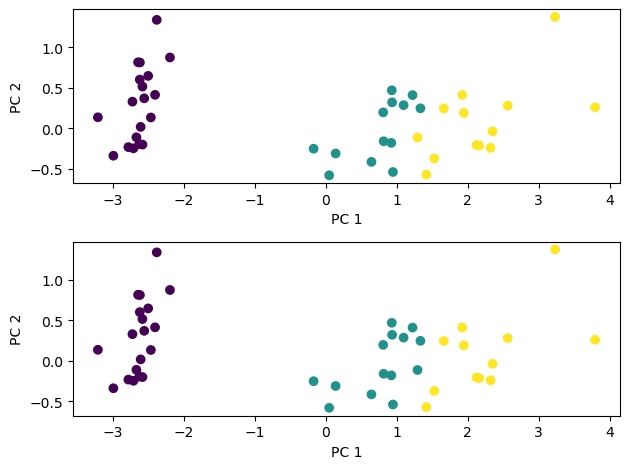

In [19]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# iris 데이터셋 로드
iris = load_iris()
X = iris.data
y = iris.target

# PCA 모델 생성
pca = PCA(n_components=2)

# 모델 학습 및 차원 축소
X_pca = pca.fit_transform(X)

# 차원 축소된 데이터 출력
print('original data shape : ', X.shape)
print('transformed data shape : ', X_pca.shape)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
clf = SVC(kernel='linear', C=1.0, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('accuracy : ', accuracy)
# 결과 시각화
import matplotlib.pyplot as plt
plt.subplot(2, 1, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test)
plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.subplot(2, 1, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_pred)
plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.tight_layout()  # 서브 플롯 간격 조절
plt.show()

##Feature selection

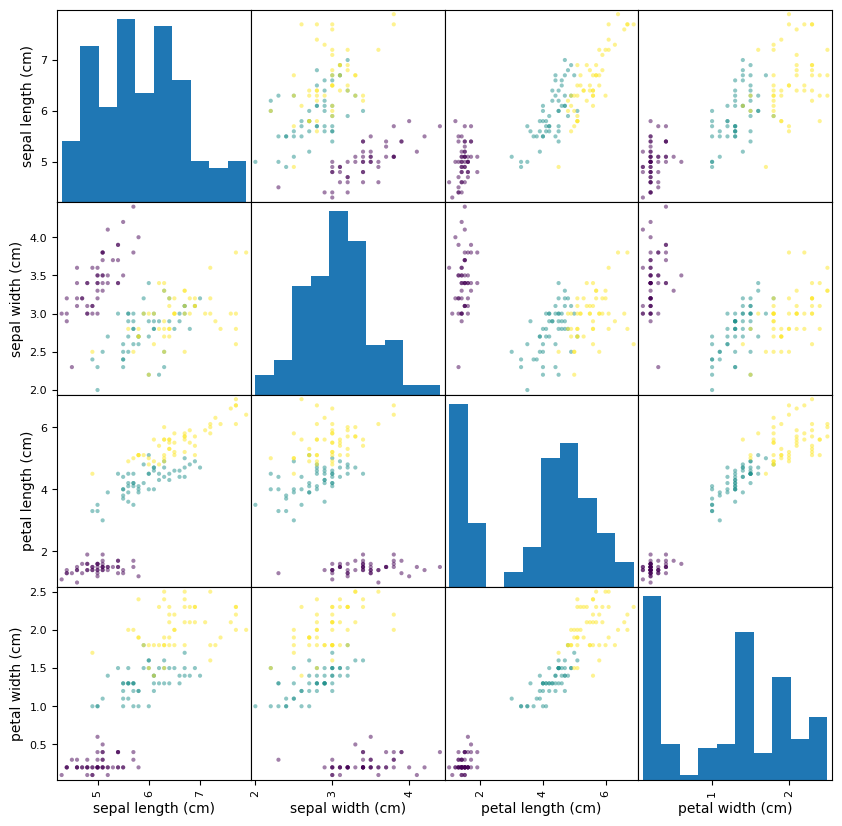

In [20]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.plotting.scatter_matrix(df, figsize=(10, 10), c= iris.target)
plt.show()

# plt.scatter(X[:, 0], X[:, 1], c=iris.target)
# plt.show()

In [21]:
from IPython.display import display, HTML
display(HTML("<style>.output_result{max-height:4000px !important;}</style>"))

accuracy :  0.8
accuracy :  1.0
accuracy :  0.9777777777777777
accuracy :  1.0
accuracy :  1.0
accuracy :  1.0


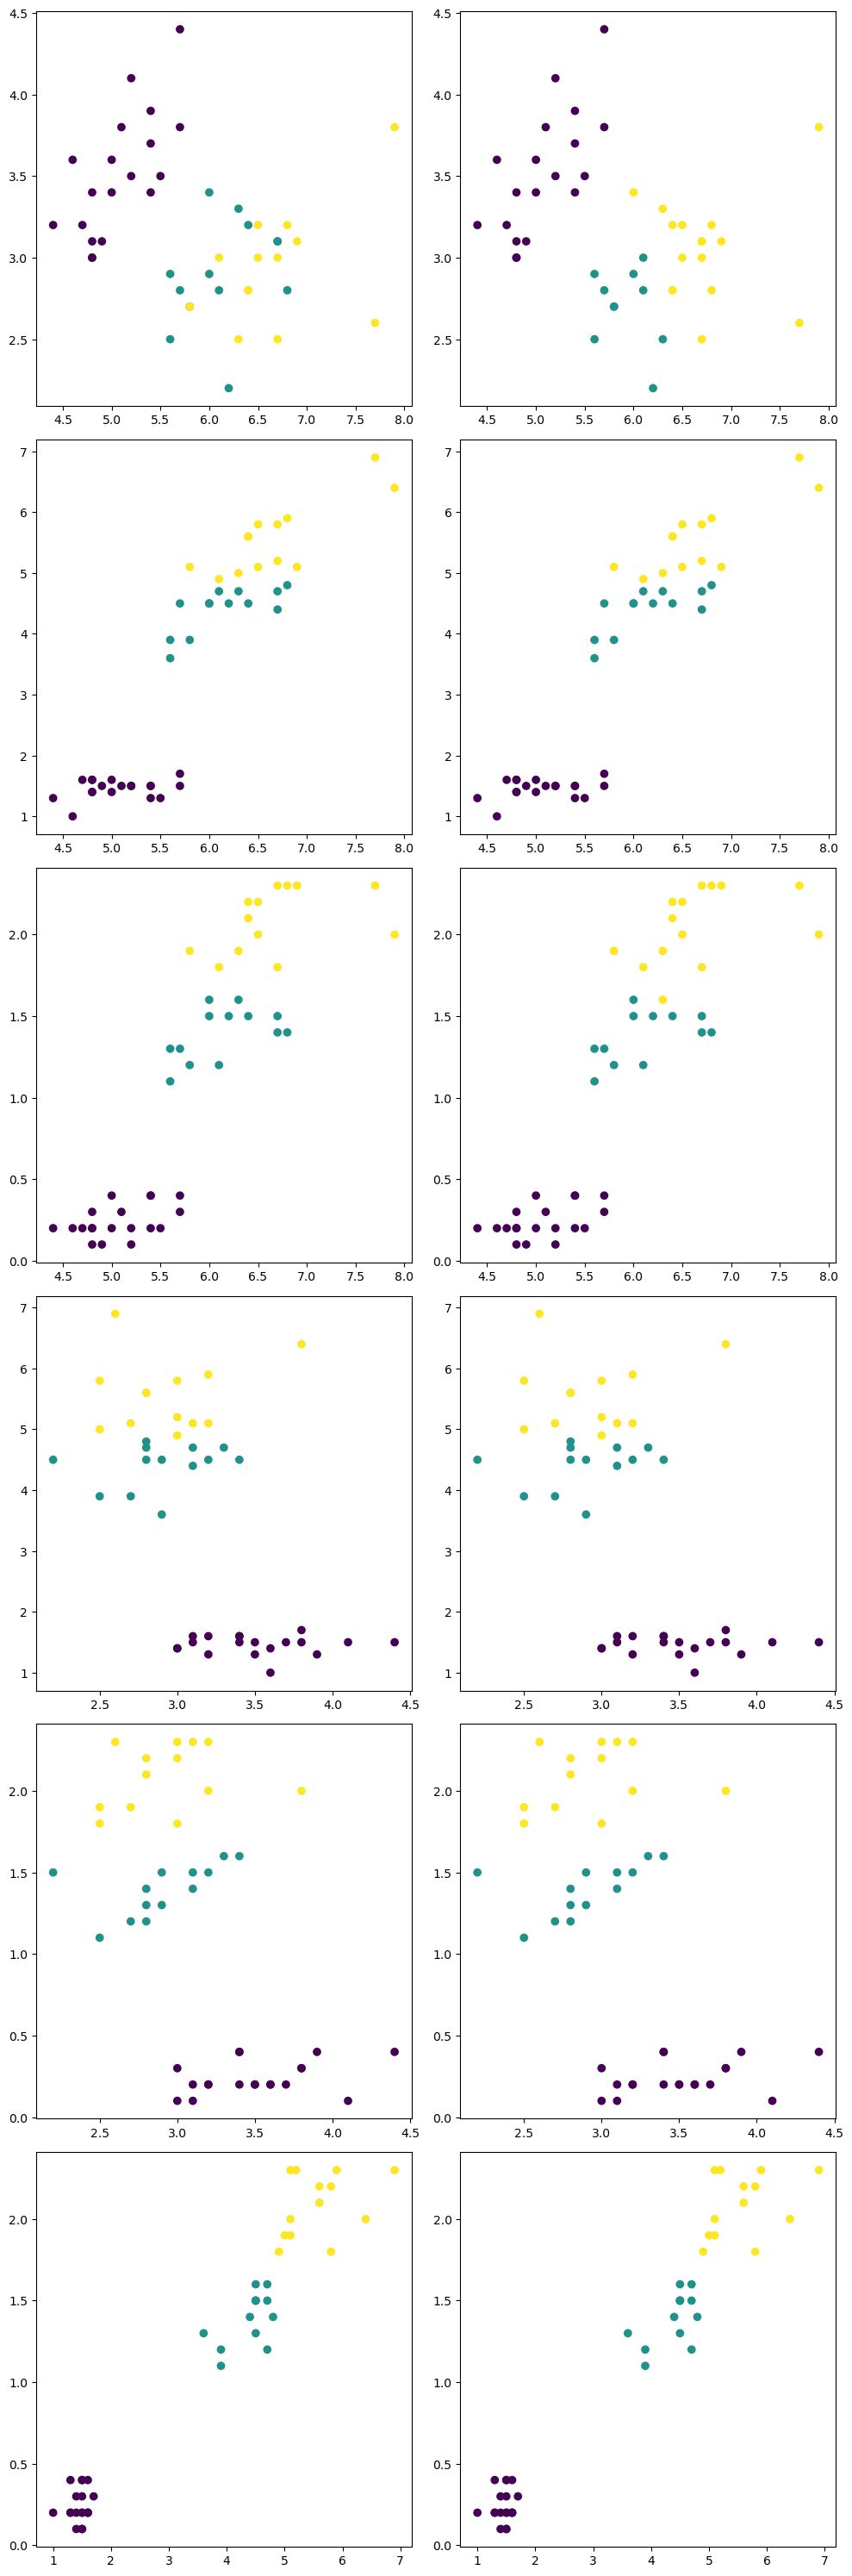

In [22]:
#feature selection + svc
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# iris 데이터셋 로드
iris = load_iris()
X = iris.data
y = iris.target


####
fig, axes = plt.subplots(6, 2, figsize=(10, 30))  # 전체 플롯의 크기 지정
k = 1
for i in range(4) : 
  for j in range(i+1, 4) : 
    # print('i : ', i, ', j : ', j)
    # print(type(X))
    # 모델 학습 및 feature selection
    X_2feature = X[:, [i,j] ]

    # feature selection된 데이터 출력
    # print('original data shape : ', X.shape)
    # print('selected data shape : ', X_2feature.shape)

    X_train, X_test, y_train, y_test = train_test_split(X_2feature, y, test_size=0.3, random_state=42)
    clf = SVC(kernel='linear', C=1.0, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print('accuracy : ', accuracy)
    # 결과 시각화

    plt.subplot(6, 2, k)
    plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test)
    # plt.xlabel('PC 1')
    # plt.ylabel('PC 2')
    # plt.title('k  : ', k,' real_value')

    plt.subplot(6, 2, k+1)
    plt.scatter(X_test[:, 0], X_test[:, 1], c = y_pred)
    # plt.xlabel('PC 1')
    # plt.ylabel('PC 2')
    # plt.title('k  : ', k, ' predicted_value')

    k = k + 2
    ####

plt.tight_layout()  # 서브 플롯 간격 조절
plt.show()